In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [23]:
n = 100000
Tensao = stats.norm.rvs(7.69,0.14,n)
DensidadeCorrente = stats.norm.rvs(77,3,n)

In [24]:
Rugosidade = np.zeros(n)
for i in range(n):
    Rugosidade[i] = 957.488 - 4.80512*DensidadeCorrente[i] - 189.289*Tensao[i] +\
                    0.030869*DensidadeCorrente[i]**2 + 12.2526*Tensao[i]**2

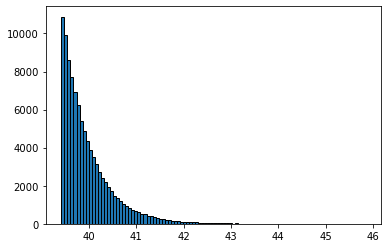

In [25]:
plt.hist( Rugosidade , bins=100, edgecolor='black');

In [26]:
resumo = stats.describe(Rugosidade)

print('Valor mínimo: %.6f'%resumo.minmax[0])
print('Valor máximo: %.6f'%resumo.minmax[1])
print('Média: %.6f'%resumo.mean)
print('Desvio padrão: %.6f'%np.sqrt(resumo.variance))

Valor mínimo: 39.418791
Valor máximo: 45.846617
Média: 39.971906
Desvio padrão: 0.553659


In [27]:
#pip install distfit
from distfit import distfit

dist = distfit(alpha=0.05, smooth=10);
dist.fit_transform(Rugosidade);

# Best fitted model
best_distr = dist.model

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0510391] [loc=39.972 scale=0.554]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.8849376] [loc=39.419 scale=0.553]
[distfit] >[pareto    ] [4.03 sec] [RSS: 1.9357222] [loc=-0.224 scale=39.643]
[distfit] >[dweibull  ] [0.95 sec] [RSS: 0.5541414] [loc=39.812 scale=0.387]
[distfit] >[t         ] [1.52 sec] [RSS: 0.6814137] [loc=39.816 scale=0.324]
[distfit] >[genextreme] [2.25 sec] [RSS: 2.0987411] [loc=39.672 scale=0.255]
[distfit] >[gamma     ] [1.40 sec] [RSS: 1.8901166] [loc=39.419 scale=0.554]
[distfit] >[lognorm   ] [1.51 sec] [RSS: 2.3857078] [loc=39.378 scale=0.392]
[distfit] >[beta      ] [3.07 sec] [RSS: 1.8677930] [loc=39.419 scale=70.793]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.3914514] [loc=39.419 scale=6.428]
[distfit] >[loggamma  ] [2.06 sec] [RSS: 0.0493042] [loc=-81.452 scale=17.716]
[distfit] >Compute confidence interval [parametric]


[distfit] >plot..


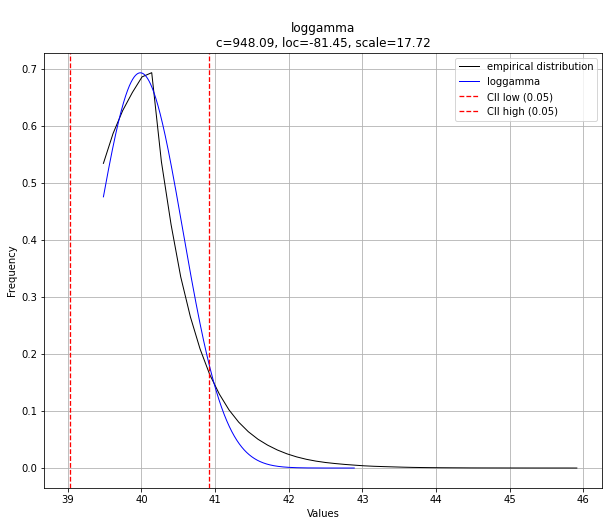

In [28]:
dist.plot();

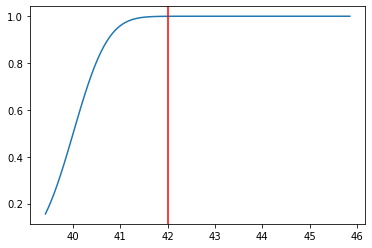

In [55]:
#plt.hist( Rugosidade , bins=100, edgecolor='black');

x = np.linspace(Rugosidade.min(),Rugosidade.max(),100)

plt.plot( x , stats.loggamma.cdf(x,948.09,-81.45,17.72) )
plt.axvline(x=42, ymin=0, ymax=1, color = 'r')

In [69]:
# c, loc, scale -> c é o parâmetro da distribuição
prob = stats.loggamma.sf(42, 948.09, -81.45, 17.72)
print('A probabilidade da rugosidade estar acima de 42 é %.3f%%'%(prob*100) )

prob = stats.loggamma.cdf(42, 948.09, -81.45, 17.72)
print('A probabilidade da rugosidade estar abaixo de 42 é %.3f%%'%(prob*100) )


A probabilidade da rugosidade estar acima de 42 é 0.021%
A probabilidade da rugosidade estar abaixo de 42 é 99.979%
